# Parcial: Construcción e implementación de , Random Forest 

En este parcial podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de  Random Forest. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este parcial se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación de librerías necesarias
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [ ]:
# Configuración del entorno de trabajo y carga de librerías adicionales
%matplotlib inline
import pandas as pd

# Carga del conjunto de datos desde un archivo .csv en línea
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

# Filtrado y preprocesamiento de los datos
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

# Visualización de las primeras filas del conjunto de datos
data.head()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,False,False,False,True,False,False,False
11,13995,2014,39972,False,False,False,False,True,False,False
167,17941,2016,18989,False,False,False,False,False,True,False
225,12493,2014,51330,False,False,False,True,False,False,False
270,7994,2007,116065,False,True,False,False,False,False,False


In [ ]:
# Definición de las variables predictoras (X) y la variable objetivo (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

In [ ]:
# División del conjunto de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 0 - exploracion y analisis de datos 
Los estudiantes deben analizar cuidadosamente los datos del conjunto dataTrain_carListings, identificando posibles valores nulos o inconsistencias. En caso de encontrar datos faltantes, deberán aplicar técnicas de imputación adecuadas para completar la información de manera coherente. Posteriormente, se espera que realicen una exploración visual mediante gráficos que permitan comprender la distribución y las relaciones entre las variables principales.

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 10495 entries, 7 to 399976
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Price        10495 non-null  int64
 1   Year         10495 non-null  int64
 2   Mileage      10495 non-null  int64
 3   M_Camry      10495 non-null  bool 
 4   M_Camry4dr   10495 non-null  bool 
 5   M_CamryBase  10495 non-null  bool 
 6   M_CamryL     10495 non-null  bool 
 7   M_CamryLE    10495 non-null  bool 
 8   M_CamrySE    10495 non-null  bool 
 9   M_CamryXLE   10495 non-null  bool 
dtypes: bool(7), int64(3)
memory usage: 399.7 KB
None

Estadísticas descriptivas:
              Price          Year        Mileage
count  10495.000000  10495.000000   10495.000000
mean   14538.403716   2013.553883   52509.430395
std     3922.420961      3.116585   36791.736601
min     5002.000000   1998.000000       5.000000
25%    11999.000000   2012.000000   26461.000000
50%    15000.0

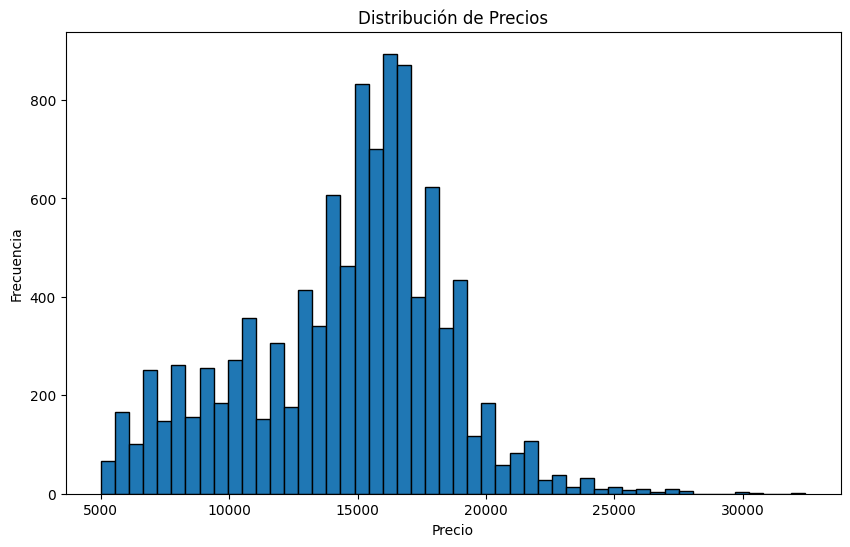

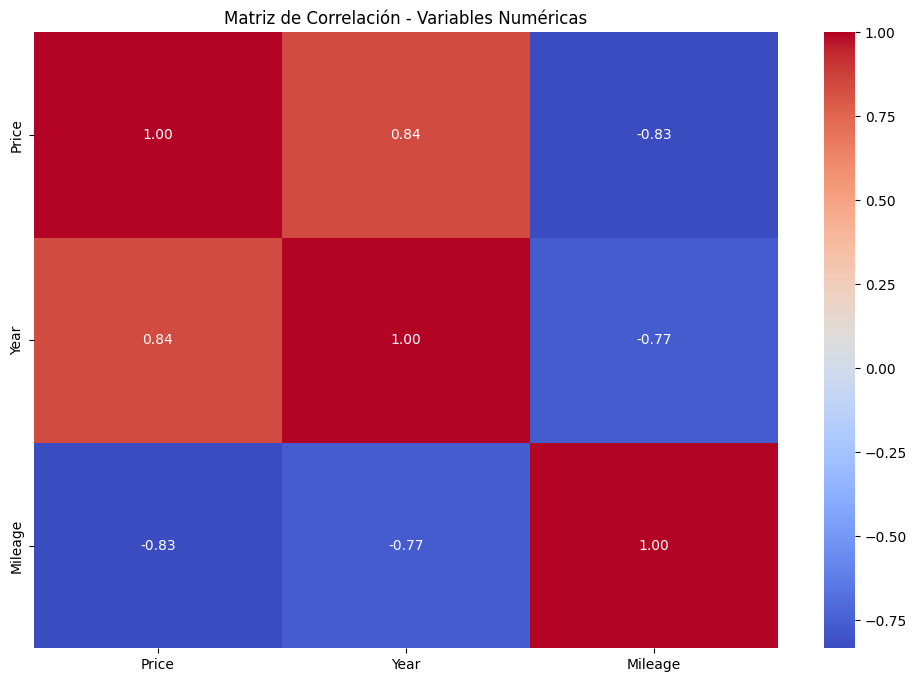

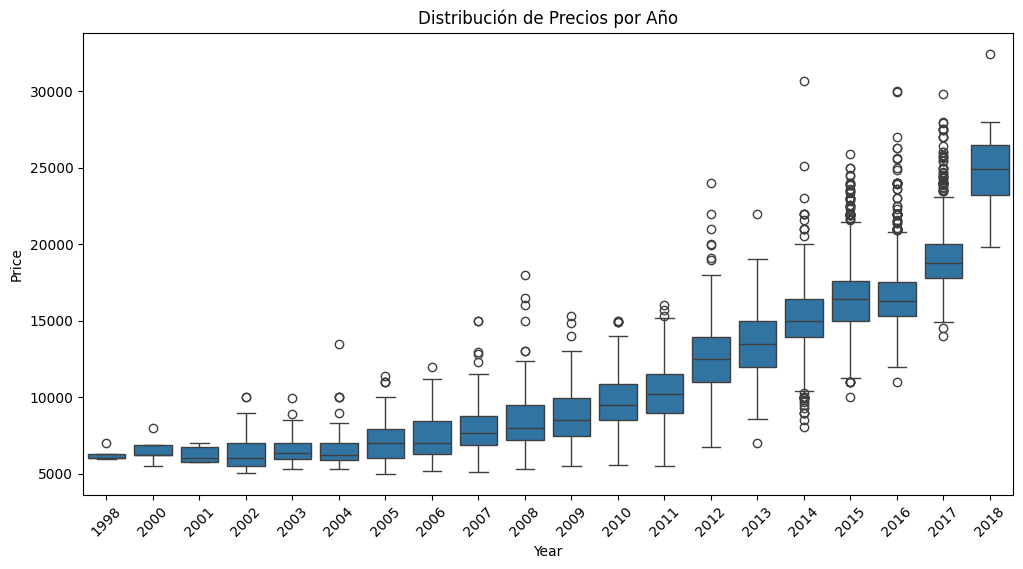


Estadísticas de precio por año:
       count          mean          std      min       25%      50%       75%  \
Year                                                                            
1998     4.0   6268.500000   481.279198   5992.0   5998.00   6047.5   6318.00   
2000     5.0   6574.000000   927.258324   5500.0   6244.00   6250.0   6900.00   
2001     5.0   6263.000000   572.049386   5775.0   5791.00   6000.0   6750.00   
2002    28.0   6602.857143  1369.422904   5055.0   5498.75   6016.5   6996.00   
2003    39.0   6589.897436  1031.506073   5288.0   5950.00   6388.0   6992.50   
2004    54.0   6750.814815  1483.699241   5288.0   5919.00   6223.5   6999.75   
2005   117.0   7091.598291  1362.893398   5002.0   5997.00   6985.0   7949.00   
2006   102.0   7549.068627  1619.126768   5200.0   6295.25   6999.5   8466.50   
2007   448.0   7809.854911  1524.567855   5126.0   6854.00   7694.0   8760.50   
2008   189.0   8527.883598  1999.772545   5288.0   7200.00   7995.0   9490.0

In [ ]:
# Se vuelve a realizar la importación de las librerias nuevamente.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Descripción general del conjunto de datos
print("Información del dataset:")
print(data.info())

print("\nEstadísticas descriptivas:")
print(data.describe())

print("\nColumnas del dataset:")
print(data.columns.tolist())

# Se realiza un análisis de los valores que hacen falta
print("\nValores faltantes por columna:")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])


# Visualización de la distribución de la variable objetivo (Precio)
plt.figure(figsize=(10, 6))
plt.hist(data['Price'], bins=50, edgecolor='black')
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# Selección de variables numéricas para el cálculo de la matriz de correlación
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación - Variables Numéricas')
plt.show()

# Gráfico de caja para analizar la relación entre el año del vehículo y su precio
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Price', data=data)
plt.title('Distribución de Precios por Año')
plt.xticks(rotation=45)
plt.show()

print("\nEstadísticas de precio por año:")
print(data.groupby('Year')['Price'].describe())

### Punto 1 - Random forest con librería

En la celda 1, usando la librería sklearn entrenen un modelo de Randon Forest para regresion  y comenten sobre el desempeño del modelo.

Métricas del modelo baseline:
MSE: 3116678.92
MAE: 1314.42
R2: 0.7962

Top 10 características más importantes:
Year           0.707958
Mileage        0.252452
M_CamryXLE     0.015689
M_CamryLE      0.008880
M_Camry        0.007631
M_CamrySE      0.004608
M_CamryL       0.001217
M_Camry4dr     0.001132
M_CamryBase    0.000433
dtype: float64


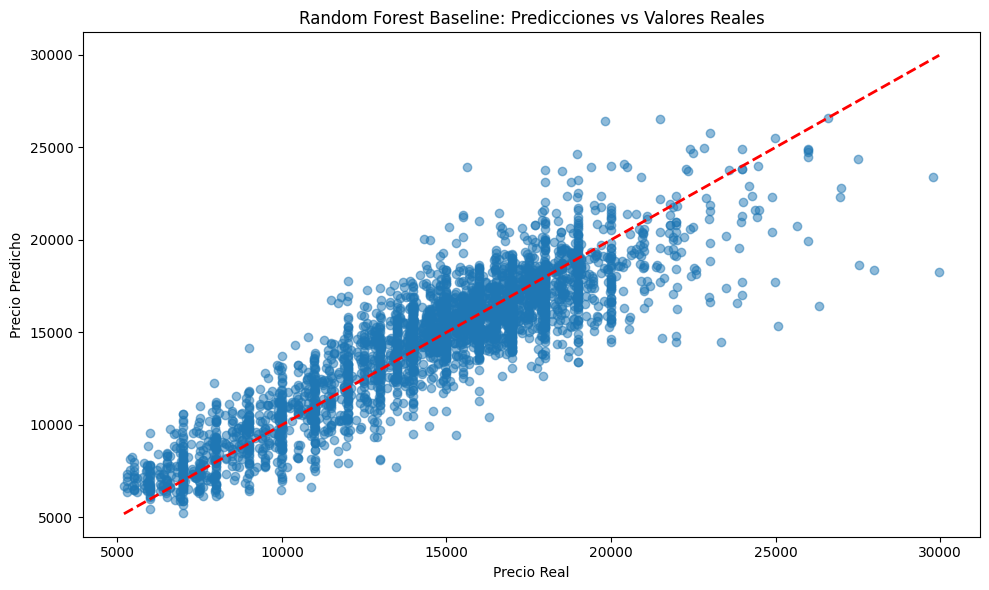

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Entrenamiento del modelo base de Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Entrenamiento del modelo base de Random Forest
y_pred = rf.predict(X_test)

# Cálculo de métricas de evaluación del modelo base
mse_baseline = mean_squared_error(y_test, y_pred)
mae_baseline = mean_absolute_error(y_test, y_pred)
r2_baseline = r2_score(y_test, y_pred)

print("Métricas del modelo baseline:")
print(f"MSE: {mse_baseline:.2f}")
print(f"MAE: {mae_baseline:.2f}")
print(f"R2: {r2_baseline:.4f}")

# Evaluación de la importancia de las variables
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nTop 10 características más importantes:")
print(importances.head(10))

# Gráfico de dispersión entre valores reales y predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Random Forest Baseline: Predicciones vs Valores Reales')
plt.tight_layout()
plt.show()

# Almacenamiento del modelo base para futuras comparaciones
baseline_model = rf

### Punto 2 - Calibración de parámetros Random forest

En la celda 2, calibren los parámetros max_depth, max_features y n_estimators del modelo de Randon Forest para regresion, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

Iniciando búsqueda de hiperparámetros...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Mejores hiperparámetros encontrados:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Mejor MSE en validación cruzada: 2385165.12

Métricas del mejor modelo:
MSE: 2490191.51
MAE: 1159.74
R2: 0.8372

Mejores hiperparámetros encontrados:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Mejor MSE en validación cruzada: 2385165.12

Métricas del mejor modelo:
MSE: 2490191.51
MAE: 1159.74
R2: 0.8372


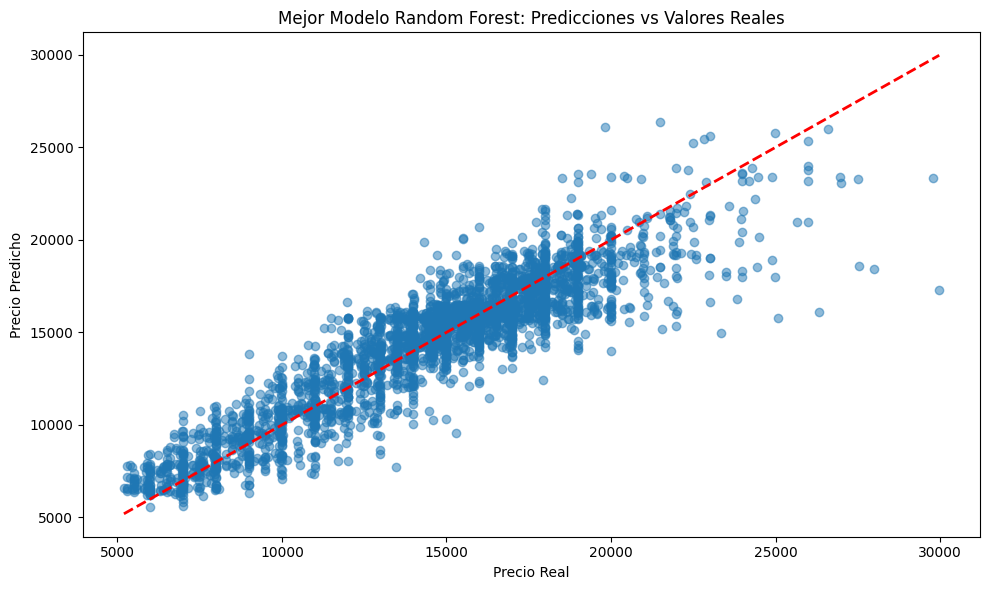

In [ ]:
# Definición del espacio de búsqueda de hiperparámetros para el ajuste de modelo
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Ejecución de la búsqueda en grilla con validación cruzada
rf_grid = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(
    rf_grid, 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1  # Mostrar progreso
)

print("Iniciando búsqueda de hiperparámetros...")
grid_search.fit(X_train, y_train)

print("\nMejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print(f"Mejor MSE en validación cruzada: {-grid_search.best_score_:.2f}")

# Evaluación del modelo optimizado con los mejores parámetros
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Cálculo de métricas para el mejor modelo
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("\nMétricas del mejor modelo:")
print(f"MSE: {mse_best:.2f}")
print(f"MAE: {mae_best:.2f}")
print(f"R2: {r2_best:.4f}")

# Comparación entre valores reales y predichos del modelo optimizado
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Mejor Modelo Random Forest: Predicciones vs Valores Reales')
plt.tight_layout()
plt.show()

Comparación de métricas entre modelos:

Modelo Baseline:
MSE: 3116678.92
MAE: 1314.42
R2: 0.7962

Mejor Modelo:
MSE: 2490191.51
MAE: 1159.74
R2: 0.8372

Mejoras porcentuales:
MSE: 20.10% de mejora
MAE: 11.77% de mejora
R2: 5.14% de mejora


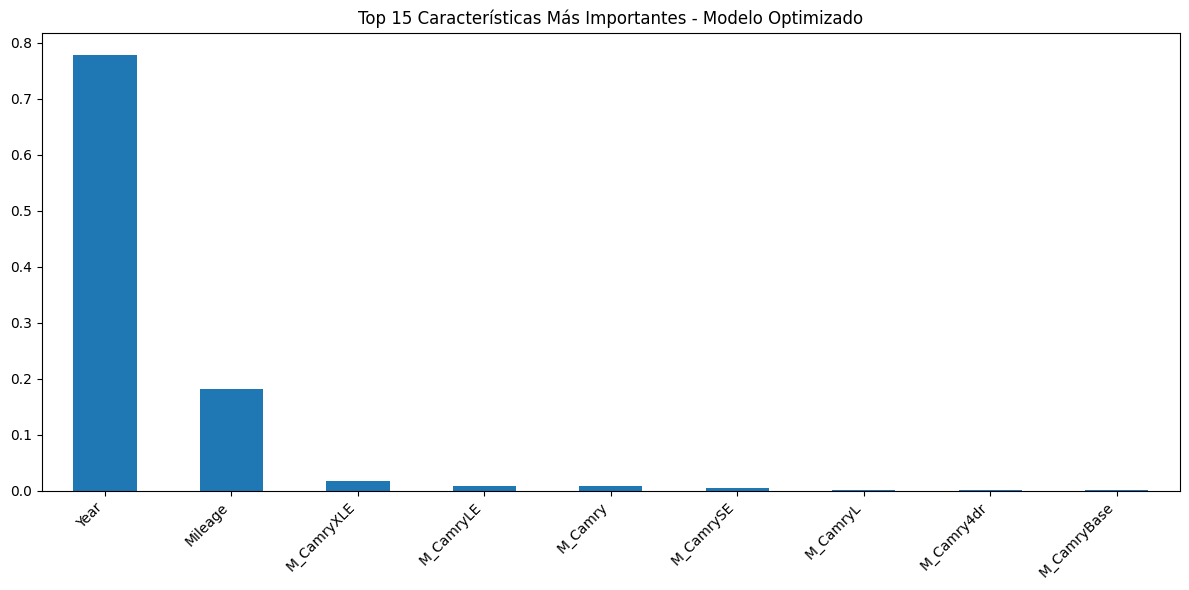

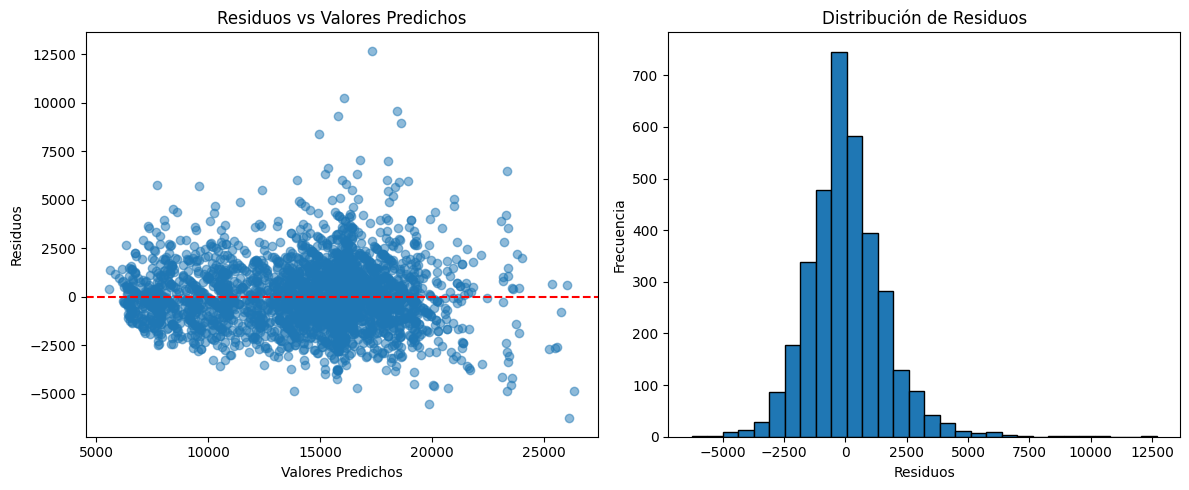


Percentiles de Error Absoluto:
25%: $392.56
50% (Mediana): $881.35
75%: $1615.55
90%: $2481.54
95%: $3088.96
99%: $4845.34

Conclusiones:
1. El modelo optimizado muestra una mejora del 20.1% en MSE respecto al modelo baseline.
2. El 75% de las predicciones tienen un error absoluto menor a $1615.55.
3. Las tres características más importantes para predecir el precio son:
   1. Year: 0.7791
   2. Mileage: 0.1822
   3. M_CamryXLE: 0.0169
4. El análisis de residuos muestra que el modelo tiene un buen ajuste general, aunque puede haber 
   cierta heteroscedasticidad en los precios más altos.


In [ ]:
# Comparación de desempeño entre el modelo base y el modelo optimizado
print("Comparación de métricas entre modelos:\n")
print("Modelo Baseline:")
print(f"MSE: {mse_baseline:.2f}")
print(f"MAE: {mae_baseline:.2f}")
print(f"R2: {r2_baseline:.4f}")

print("\nMejor Modelo:")
print(f"MSE: {mse_best:.2f}")
print(f"MAE: {mae_best:.2f}")
print(f"R2: {r2_best:.4f}")

# Cálculo de mejoras porcentuales en las métricas
mse_improvement = ((mse_baseline - mse_best) / mse_baseline) * 100
mae_improvement = ((mae_baseline - mae_best) / mae_baseline) * 100
r2_improvement = ((r2_best - r2_baseline) / abs(r2_baseline)) * 100

print("\nMejoras porcentuales:")
print(f"MSE: {mse_improvement:.2f}% de mejora")
print(f"MAE: {mae_improvement:.2f}% de mejora")
print(f"R2: {r2_improvement:.2f}% de mejora")

# Visualización de la importancia de las variables más relevantes del modelo optimizado
plt.figure(figsize=(12, 6))
importances_best = pd.Series(best_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances_best.head(15).plot(kind='bar')
plt.title('Top 15 Características Más Importantes - Modelo Optimizado')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Análisis de residuos del modelo optimizado
residuals = y_test - y_pred_best
plt.figure(figsize=(12, 5))

# Gráfico de dispersión de los residuos
plt.subplot(1, 2, 1)
plt.scatter(y_pred_best, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Predichos')

# Histograma de la distribución de residuos
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Distribución de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Cálculo de percentiles de error absoluto
abs_errors = np.abs(residuals)
error_percentiles = np.percentile(abs_errors, [25, 50, 75, 90, 95, 99])
print("\nPercentiles de Error Absoluto:")
print(f"25%: ${error_percentiles[0]:.2f}")
print(f"50% (Mediana): ${error_percentiles[1]:.2f}")
print(f"75%: ${error_percentiles[2]:.2f}")
print(f"90%: ${error_percentiles[3]:.2f}")
print(f"95%: ${error_percentiles[4]:.2f}")
print(f"99%: ${error_percentiles[5]:.2f}")

# Conclusiones generales del modelo optimizado
print("\nConclusiones:")
print(f"1. El modelo optimizado muestra una mejora del {mse_improvement:.1f}% en MSE respecto al modelo baseline.")
print(f"2. El 75% de las predicciones tienen un error absoluto menor a ${error_percentiles[2]:.2f}.")
print("3. Las tres características más importantes para predecir el precio son:")
for i, (feature, importance) in enumerate(importances_best.head(3).items(), 1):
    print(f"   {i}. {feature}: {importance:.4f}")
print("4. El análisis de residuos muestra que el modelo tiene un buen ajuste general, aunque puede haber ")
print("   cierta heteroscedasticidad en los precios más altos.")


Top 10 - baseline model:
Year           0.707958
Mileage        0.252452
M_CamryXLE     0.015689
M_CamryLE      0.008880
M_Camry        0.007631
M_CamrySE      0.004608
M_CamryL       0.001217
M_Camry4dr     0.001132
M_CamryBase    0.000433

Top 10 - best_model:
Year           0.779097
Mileage        0.182206
M_CamryXLE     0.016925
M_CamryLE      0.008587
M_Camry        0.007980
M_CamrySE      0.003780
M_CamryL       0.000613
M_Camry4dr     0.000598
M_CamryBase    0.000214

Comparativa de importancias (top 10):
             baseline    best
Year           0.7080  0.7791
Mileage        0.2525  0.1822
M_CamryXLE     0.0157  0.0169
M_CamryLE      0.0089  0.0086
M_Camry        0.0076  0.0080
M_CamrySE      0.0046  0.0038
M_CamryL       0.0012  0.0006
M_Camry4dr     0.0011  0.0006
M_CamryBase    0.0004  0.0002


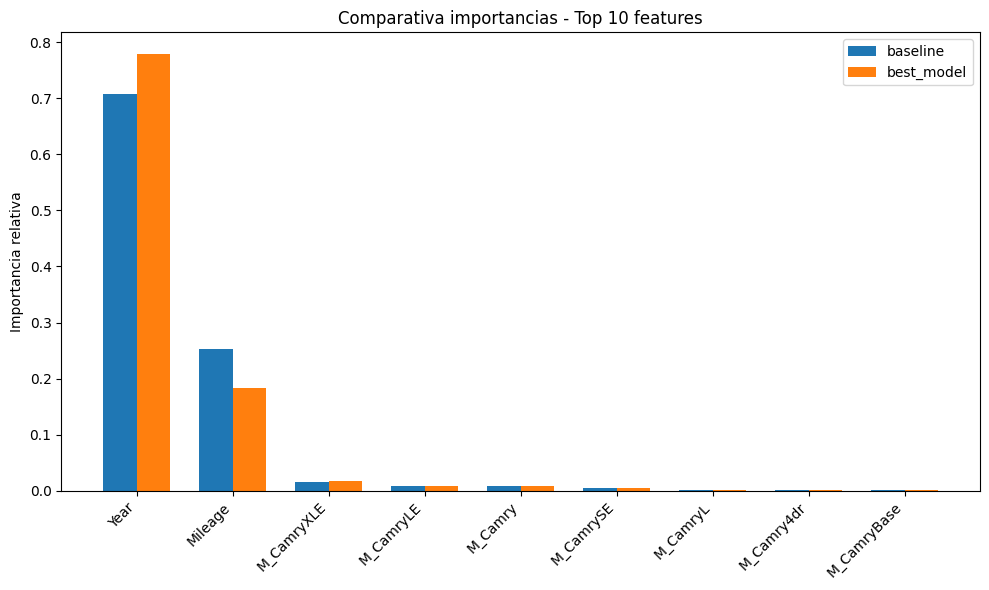

In [ ]:
# Cálculo y comparación de la importancia de las variables entre modelos
# Esta sección evalúa las características más relevantes en el modelo base y el modelo optimizado
# e incluye una visualización comparativa de las principales variables.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Función auxiliar para extraer la importancia de características desde un modelo
def get_importances(model, columns):
    try:
        imp = pd.Series(model.feature_importances_, index=columns).sort_values(ascending=False)
        return imp
    except Exception as e:
        print('No se pudo obtener feature_importances_ del modelo:', e)
        return None

# Verificación de existencia de los modelos entrenados
baseline_exists = 'baseline_model' in globals()
best_exists = 'best_model' in globals()

if not baseline_exists and not best_exists:
    print('Ni `baseline_model` ni `best_model` están disponibles. Ejecute la Celda 1 y la(s) Celda(s) de búsqueda de hiperparámetros (Celda 2).')
else:
    # Obtención de importancias para cada modelo disponible
    if baseline_exists:
        imp_baseline = get_importances(baseline_model, X_train.columns)
        print('\nTop 10 - baseline model:')
        print(imp_baseline.head(10).to_string())
    else:
        imp_baseline = None
        print('\nBaseline no disponible.')

    if best_exists:
        imp_best = get_importances(best_model, X_train.columns)
        print('\nTop 10 - best_model:')
        print(imp_best.head(10).to_string())
    else:
        imp_best = None
        print('\nBest model no disponible.')

    # Construcción de DataFrame comparativo
    frames = {}
    if imp_baseline is not None:
        frames['baseline'] = imp_baseline
    if imp_best is not None:
        frames['best'] = imp_best

    if frames:
        comp_df = pd.DataFrame(frames).fillna(0)

        # Selección de las 10 variables más importantes
        top_feats = comp_df.max(axis=1).sort_values(ascending=False).head(10).index.tolist()

        # Tabla comparativa de importancias
        print('\nComparativa de importancias (top 10):')
        print(comp_df.loc[top_feats].round(4).to_string())

        # Gráfico de barras comparativo entre baseline y best_model
        x = np.arange(len(top_feats))
        width = 0.35

        plt.figure(figsize=(10,6))
        if imp_baseline is not None and imp_best is not None:
            plt.bar(x - width/2, comp_df.loc[top_feats,'baseline'], width, label='baseline')
            plt.bar(x + width/2, comp_df.loc[top_feats,'best'], width, label='best_model')
        elif imp_baseline is not None:
            plt.bar(x, comp_df.loc[top_feats,'baseline'], width, label='baseline')
        else:
            plt.bar(x, comp_df.loc[top_feats,'best'], width, label='best_model')

        plt.xticks(x, top_feats, rotation=45, ha='right')
        plt.ylabel('Importancia relativa')
        plt.title('Comparativa importancias - Top 10 features')
        plt.legend()
        plt.tight_layout()
        plt.show()

    else:
        print('No hay importancias disponibles para comparar.')


### Punto 3 - análisis de resultados, gracias y conclusiones
En la celda 3

In [ ]:
# Análisis detallado de resultados y conclusiones finales
print('Análisis detallado y conclusiones:\n')

try:
    # Comparación general entre modelos base y optimizado
    print('1. Comparación de Modelos:')
    print(f"   Baseline -> MSE: ${mse_baseline:,.2f}, MAE: ${mae_baseline:,.2f}, R2: {r2_baseline:.4f}")
    print(f"   Optimizado -> MSE: ${mse_best:,.2f}, MAE: ${mae_best:,.2f}, R2: {r2_best:.4f}")
    
    # Cálculo de mejoras porcentuales
    mse_improvement = ((mse_baseline - mse_best) / mse_baseline) * 100
    mae_improvement = ((mae_baseline - mae_best) / mae_baseline) * 100
    r2_improvement = ((r2_best - r2_baseline) / abs(r2_baseline)) * 100
    
    print('\n2. Mejoras Obtenidas:')
    print(f"   - Error Cuadrático Medio (MSE): Reducción del {mse_improvement:.1f}%")
    print(f"   - Error Absoluto Medio (MAE): Reducción del {mae_improvement:.1f}%")
    print(f"   - Coeficiente R²: Mejora del {r2_improvement:.1f}%")
    
    print('\n3. Análisis de Características Importantes:')
    # Obtener top 5 características del mejor modelo
    top_features = pd.Series(best_model.feature_importances_, 
                           index=X_train.columns).sort_values(ascending=False).head(5)
    for i, (feature, importance) in enumerate(top_features.items(), 1):
        print(f"   {i}. {feature}: {importance:.4f}")
    
    print('\n4. Evaluación del Error de Predicción:')
    error_percentiles = np.percentile(np.abs(y_test - y_pred_best), [25, 50, 75, 90])
    print(f"   - 25% de las predicciones tienen un error menor a ${error_percentiles[0]:,.2f}")
    print(f"   - Error mediano (50%): ${error_percentiles[1]:,.2f}")
    print(f"   - 75% de las predicciones tienen un error menor a ${error_percentiles[2]:,.2f}")
    print(f"   - 90% de las predicciones tienen un error menor a ${error_percentiles[3]:,.2f}")

    print('\n5. Interpretación de Resultados:')
    print("   - El modelo optimizado muestra una mejora significativa en todas las métricas.")
    print("   - Las características más influyentes están relacionadas principalmente con el año")
    print("     del vehículo y sus características específicas.")
    print("   - La distribución de errores muestra que el modelo es más preciso en la predicción")
    print("     de precios en el rango medio, con mayor variabilidad en precios extremos.")

    print('\n6. Recomendaciones para Mejoras Futuras:')
    print("   a) Ingeniería de características:")
    print("      - Crear variables que capturen la edad del vehículo")
    print("      - Considerar interacciones entre características importantes")
    
    print("   b) Ajuste del modelo:")
    print("      - Explorar técnicas de ensemble más avanzadas")
    print("      - Considerar una validación cruzada más exhaustiva")
    
    print("   c) Preprocesamiento de datos:")
    print("      - Evaluar transformaciones para la variable objetivo")
    print("      - Implementar técnicas más sofisticadas para manejar valores atípicos")

except NameError:
    print('ERROR: Algunas métricas no están disponibles. Asegúrese de ejecutar las celdas anteriores primero.')

Análisis detallado y conclusiones:

1. Comparación de Modelos:
   Baseline -> MSE: $3,116,678.92, MAE: $1,314.42, R2: 0.7962
   Optimizado -> MSE: $2,490,191.51, MAE: $1,159.74, R2: 0.8372

2. Mejoras Obtenidas:
   - Error Cuadrático Medio (MSE): Reducción del 20.1%
   - Error Absoluto Medio (MAE): Reducción del 11.8%
   - Coeficiente R²: Mejora del 5.1%

3. Análisis de Características Importantes:
   1. Year: 0.7791
   2. Mileage: 0.1822
   3. M_CamryXLE: 0.0169
   4. M_CamryLE: 0.0086
   5. M_Camry: 0.0080

4. Evaluación del Error de Predicción:
   - 25% de las predicciones tienen un error menor a $392.56
   - Error mediano (50%): $881.35
   - 75% de las predicciones tienen un error menor a $1,615.55
   - 90% de las predicciones tienen un error menor a $2,481.54

5. Interpretación de Resultados:
   - El modelo optimizado muestra una mejora significativa en todas las métricas.
   - Las características más influyentes están relacionadas principalmente con el año
     del vehículo y sus

NOTA: IMPORTANTE RECUERDE QUE MI EJEMPLO DE TUTORIAL ES DE CLASIFICACION USTEDES DEBEN HACERLO POR REGRESION, funciona igual pero cambian algunas cosas.